In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import qgrid
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import nltk
os.chdir(os.getcwd() + '/..')
from data_io import *
from speech import *
import time
import matplotlib.pyplot as plt

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Loading w2v window=5 dimension=100...done
Loading w2v window=5 dimension=150...done
Loading w2v window=5 dimension=200...done
Loading w2v window=10 dimension=100...done
Loading w2v window=10 dimension=150...done
Loading w2v window=10 dimension=200...done
Loading w2v window=15 dimension=100...done
Loading w2v window=15 dimension=150...done
Loading w2v window=15 dimension=200...done
Loading w2v window=20 dimension=100...done
Loading w2v window=20 dimension=150...done
Loading w2v window=20 dimension=200...done


In [2]:
# Read data.
labeled = load_data()
unlabeled = load_unlabeled_data()
all_data = labeled.data + unlabeled.data

-- train data
4370
-- dev data
414
Reading unlabeled data


## 2 Clusters Glove

In [5]:
t0 = time.time()
pipe_2_glove = Pipeline([
  (f'avgw2v_tfidf', TfidfEmbeddingVectorizer(word2vec_glove,
                                             tokenizer=nltk.word_tokenize
                                             max_df=0.8)),
  ('kmeans', KMeans(n_clusters=2,
                    init='k-means++',
                    verbose=10,
                    n_jobs=-1))
])
print("Computing clusters...", end='')
pipe_2_glove.fit(np.array(all_data))
print("done")
print("%0.2fs" % (time.time() - t0))

Computing clusters...

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 124322.27310971176
Iteration 1, inertia 75122.40005119929
Iteration 2, inertia 74092.87350424477
Iteration 3, inertia 73138.01605996958
Iteration 4, inertia 72190.6357047705
Iteration 5, inertia 71612.38286086945
Iteration 6, inertia 71366.87405743083
Iteration 7, inertia 71266.19742762185
Iteration 8, inertia 71221.68156907073
Iteration 9, inertia 71201.63817725929
Iteration 10, inertia 71192.89015261232
Iteration 11, inertia 71189.21763644821
Iteration 12, inertia 71187.9786989755
Iteration 13, inertia 71187.34308954311
Iteration 14, inertia 71187.07640192244
Converged at iteration 14: center shift 3.1919158493259443e-06 within tolerance 3.314372460720649e-06.
Initialization complete
Iteration 0, inertia 122352.3369396605
Iteration 1, inertia 74571.29136962634
Iteration 2, inertia 72737.67369818885
Iteration 3, inertia 71720.71715539771
Iteration 4, inertia 71359.22310920608
Iteration 5, inertia 71248.13240304662
Iteration 6, inertia 71212

In [14]:
cluster_predictions_2_glove = pipe_2_glove.transform(labeled.data)
cluster_predictions_2_glove = normalize(cluster_predictions_2_glove, norm='l1')

In [15]:
np.average(cluster_predictions_2_glove, axis=0)

array([0.51350153, 0.48649847])

In [16]:
np.std(cluster_predictions_2_glove, axis=0)

array([0.06167222, 0.06167222])

## 19 Clusters Glove

In [9]:
t0 = time.time()
pipe_19_glove = Pipeline([
  (f'avgw2v_tfidf', TfidfEmbeddingVectorizer(word2vec_glove,
                                             tokenizer=nltk.word_tokenize)),
  ('kmeans', KMeans(n_clusters=19,
                    init='k-means++',
                    verbose=10,
                    n_jobs=-1))
])
print("Computing clusters...", end='')
pipe_19_glove.fit(np.array(all_data))
print("done")
print("%0.2fs" % (time.time() - t0))

Computing clusters...

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 77377.82721175272
Iteration 1, inertia 55629.21889320316
Iteration 2, inertia 54069.40966802425
Iteration 3, inertia 53559.60766272273
Iteration 4, inertia 53328.96755319479
Iteration 5, inertia 53191.38934583395
Iteration 6, inertia 53096.30452579528
Iteration 7, inertia 53027.609582198165
Iteration 8, inertia 52971.63037893296
Iteration 9, inertia 52923.34806104345
Iteration 10, inertia 52884.28391316013
Iteration 11, inertia 52854.70652093563
Iteration 12, inertia 52828.53882128626
Iteration 13, inertia 52805.1636004044
Iteration 14, inertia 52786.89458469051
Iteration 15, inertia 52770.31830070435
Iteration 16, inertia 52755.78593666485
Iteration 17, inertia 52739.54854334231
Iteration 18, inertia 52720.85835412964
Iteration 19, inertia 52704.887647353404
Iteration 20, inertia 52690.920262731546
Iteration 21, inertia 52679.340774723525
Iteration 22, inertia 52669.778989192426
Iteration 23, inertia 52661.01074502634
Iteration 24, inertia 

Iteration 77, inertia 52513.57519726737
Iteration 78, inertia 52513.313297685185
Iteration 79, inertia 52513.055513839834
Iteration 80, inertia 52512.87107086884
Iteration 81, inertia 52512.75554239421
Iteration 82, inertia 52512.63993102636
Iteration 83, inertia 52512.5327430954
Iteration 84, inertia 52512.42822806937
Iteration 85, inertia 52512.285995732585
Iteration 86, inertia 52512.20028837478
Iteration 87, inertia 52512.11751203519
Iteration 88, inertia 52512.04338078276
Iteration 89, inertia 52511.97306646063
Iteration 90, inertia 52511.9058323018
Iteration 91, inertia 52511.82244980376
Iteration 92, inertia 52511.708755687396
Iteration 93, inertia 52511.58490047233
Iteration 94, inertia 52511.50571079188
Iteration 95, inertia 52511.44399248572
Iteration 96, inertia 52511.38784226721
Iteration 97, inertia 52511.31438238439
Iteration 98, inertia 52511.22621616767
Iteration 99, inertia 52511.11044257782
Iteration 100, inertia 52510.95836017541
Iteration 101, inertia 52510.81737712

Iteration 39, inertia 52600.45586569489
Iteration 40, inertia 52596.123068560315
Iteration 41, inertia 52590.689074429
Iteration 42, inertia 52584.28981895873
Iteration 43, inertia 52578.26418606151
Iteration 44, inertia 52572.057652995674
Iteration 45, inertia 52566.70862351884
Iteration 46, inertia 52562.028448518184
Iteration 47, inertia 52555.53028709703
Iteration 48, inertia 52548.43922516336
Iteration 49, inertia 52541.29080000926
Iteration 50, inertia 52535.555827211436
Iteration 51, inertia 52531.58268113697
Iteration 52, inertia 52528.0123216801
Iteration 53, inertia 52524.57611493015
Iteration 54, inertia 52521.48704423756
Iteration 55, inertia 52519.10450360692
Iteration 56, inertia 52517.34970814044
Iteration 57, inertia 52515.92585586191
Iteration 58, inertia 52514.5945123308
Iteration 59, inertia 52513.563373272525
Iteration 60, inertia 52512.47599903819
Iteration 61, inertia 52511.35346029349
Iteration 62, inertia 52510.22065555663
Iteration 63, inertia 52509.12821745758

Iteration 47, inertia 52495.650744137296
Iteration 48, inertia 52493.21491229413
Iteration 49, inertia 52491.1971360489
Iteration 50, inertia 52489.562500133674
Iteration 51, inertia 52488.19743245035
Iteration 52, inertia 52486.92397392293
Iteration 53, inertia 52485.759513293786
Iteration 54, inertia 52484.74128278648
Iteration 55, inertia 52483.78555392161
Iteration 56, inertia 52483.003419429115
Iteration 57, inertia 52482.262082276975
Iteration 58, inertia 52481.48533509406
Iteration 59, inertia 52480.56737420467
Iteration 60, inertia 52479.56016783928
Iteration 61, inertia 52478.49987644123
Iteration 62, inertia 52477.793504038484
Iteration 63, inertia 52477.32651683685
Iteration 64, inertia 52476.93077320696
Iteration 65, inertia 52476.56972941937
Iteration 66, inertia 52476.176611839466
Iteration 67, inertia 52475.80940942083
Iteration 68, inertia 52475.53706303592
Iteration 69, inertia 52475.30760105212
Iteration 70, inertia 52475.089660624195
Iteration 71, inertia 52474.84159

Iteration 39, inertia 52511.26237664312
Iteration 40, inertia 52508.08353232184
Iteration 41, inertia 52504.97072993717
Iteration 42, inertia 52502.41837952399
Iteration 43, inertia 52500.54646911026
Iteration 44, inertia 52499.082136034165
Iteration 45, inertia 52497.8475277512
Iteration 46, inertia 52496.92370172017
Iteration 47, inertia 52496.07360036954
Iteration 48, inertia 52495.346174388156
Iteration 49, inertia 52494.71078669101
Iteration 50, inertia 52494.19037421614
Iteration 51, inertia 52493.75530715844
Iteration 52, inertia 52493.352725100915
Iteration 53, inertia 52492.97090279512
Iteration 54, inertia 52492.58219396154
Iteration 55, inertia 52492.26759491463
Iteration 56, inertia 52492.023289831486
Iteration 57, inertia 52491.82691696827
Iteration 58, inertia 52491.63419537486
Iteration 59, inertia 52491.46361500439
Iteration 60, inertia 52491.31544871416
Iteration 61, inertia 52491.147578689925
Iteration 62, inertia 52490.9650637921
Iteration 63, inertia 52490.726396153

Iteration 59, inertia 52555.939706884565
Iteration 60, inertia 52555.46768040613
Iteration 61, inertia 52555.16869626732
Iteration 62, inertia 52554.90163628445
Iteration 63, inertia 52554.6136186212
Iteration 64, inertia 52554.317137000166
Iteration 65, inertia 52554.069496877484
Iteration 66, inertia 52553.84149989025
Iteration 67, inertia 52553.66140086132
Iteration 68, inertia 52553.4462741201
Iteration 69, inertia 52553.197006897586
Iteration 70, inertia 52553.01454682305
Iteration 71, inertia 52552.891074065716
Iteration 72, inertia 52552.783518916476
Iteration 73, inertia 52552.68612680498
Iteration 74, inertia 52552.57738901801
Iteration 75, inertia 52552.48773260505
Iteration 76, inertia 52552.389641203
Iteration 77, inertia 52552.30009044161
Iteration 78, inertia 52552.24354371198
Iteration 79, inertia 52552.180736596325
Iteration 80, inertia 52552.12645909261
Iteration 81, inertia 52552.08299592957
Iteration 82, inertia 52552.019931445895
Iteration 83, inertia 52551.93253734

In [18]:
cluster_predictions_19_glove = pipe_19_glove.transform(labeled.data)
cluster_predictions_19_glove = normalize(cluster_predictions_19_glove, norm='l1')

In [19]:
np.average(cluster_predictions_19_glove, axis=0)

array([0.05390185, 0.05586145, 0.04594825, 0.04671511, 0.04818034,
       0.05251947, 0.04810279, 0.05258716, 0.0482945 , 0.056357  ,
       0.04923674, 0.05961091, 0.05109155, 0.05029559, 0.05940108,
       0.05142378, 0.06138786, 0.05315457, 0.05593   ])

In [20]:
np.average(np.average(cluster_predictions_19_glove, axis=0))

0.05263157894736842

In [21]:
np.std(cluster_predictions_19_glove, axis=0)

array([0.00615225, 0.00801274, 0.00724222, 0.0069674 , 0.00481193,
       0.01167332, 0.00682123, 0.00618439, 0.00434045, 0.00775391,
       0.00630158, 0.00917042, 0.00680636, 0.00828592, 0.00846788,
       0.00609447, 0.0097593 , 0.00917432, 0.00838586])

## 19 Clusters Corpus

In [22]:
t0 = time.time()
pipe_19_corpus = Pipeline([
  (f'avgw2v_tfidf', TfidfEmbeddingVectorizer(W2,
                                             tokenizer=nltk.word_tokenize
                                             max_df=0.8)),
  ('kmeans', KMeans(n_clusters=19,
                    init='k-means++',
                    verbose=10,
                    n_jobs=-1))
])
print("Computing clusters...", end='')
pipe_19_corpus.fit(np.array(all_data))
print("done")
print("%0.2fs" % (time.time() - t0))

Computing clusters...

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 171033.05460979347
Iteration 1, inertia 126677.88604893231
Iteration 2, inertia 123919.85866836937
Iteration 3, inertia 122842.9469395556
Iteration 4, inertia 122197.93468007464
Iteration 5, inertia 121715.49555613755
Iteration 6, inertia 121356.85241663337
Iteration 7, inertia 121096.67867781482
Iteration 8, inertia 120883.21293860085
Iteration 9, inertia 120698.76024512573
Iteration 10, inertia 120542.89663531077
Iteration 11, inertia 120399.94015252055
Iteration 12, inertia 120239.1294580501
Iteration 13, inertia 120061.52126188051
Iteration 14, inertia 119848.86032738037
Iteration 15, inertia 119603.74242742526
Iteration 16, inertia 119424.36617710572
Iteration 17, inertia 119329.52821988182
Iteration 18, inertia 119273.57188437141
Iteration 19, inertia 119235.42336158926
Iteration 20, inertia 119209.71054831616
Iteration 21, inertia 119192.69799247016
Iteration 22, inertia 119181.24496197492
Iteration 23, inertia 119173.66126772886
Iter

Initialization complete
Iteration 0, inertia 170130.13714474224
Iteration 1, inertia 126048.1135717856
Iteration 2, inertia 122910.61360614622
Iteration 3, inertia 121904.8216411731
Iteration 4, inertia 121390.40587648854
Iteration 5, inertia 120996.45694188634
Iteration 6, inertia 120648.73411839237
Iteration 7, inertia 120314.75345336652
Iteration 8, inertia 120056.7041944592
Iteration 9, inertia 119889.60172234823
Iteration 10, inertia 119768.46503047402
Iteration 11, inertia 119675.6881060511
Iteration 12, inertia 119600.20058557653
Iteration 13, inertia 119535.34666724112
Iteration 14, inertia 119482.62020974678
Iteration 15, inertia 119436.405878314
Iteration 16, inertia 119402.30580263179
Iteration 17, inertia 119375.28676606111
Iteration 18, inertia 119351.02549352369
Iteration 19, inertia 119327.99495631111
Iteration 20, inertia 119307.54400285227
Iteration 21, inertia 119290.93369186435
Iteration 22, inertia 119277.52236139322
Iteration 23, inertia 119264.02417181556
Iteratio

Initialization complete
Iteration 0, inertia 176891.50379282932
Iteration 1, inertia 127047.77539214944
Iteration 2, inertia 123784.22659553803
Iteration 3, inertia 122838.3827365736
Iteration 4, inertia 122320.17806167927
Iteration 5, inertia 121950.72894280126
Iteration 6, inertia 121685.61394568073
Iteration 7, inertia 121500.87394582675
Iteration 8, inertia 121346.6236247288
Iteration 9, inertia 121196.65503736671
Iteration 10, inertia 121051.02268520196
Iteration 11, inertia 120911.69409120164
Iteration 12, inertia 120777.17917321582
Iteration 13, inertia 120660.03152048841
Iteration 14, inertia 120560.79087267595
Iteration 15, inertia 120481.98909627595
Iteration 16, inertia 120414.10796006015
Iteration 17, inertia 120356.72390974792
Iteration 18, inertia 120314.24533524059
Iteration 19, inertia 120280.1855125958
Iteration 20, inertia 120250.33175143276
Iteration 21, inertia 120222.04953661237
Iteration 22, inertia 120197.79985876984
Iteration 23, inertia 120177.41935759338
Itera

Initialization complete
Iteration 0, inertia 170442.90742304217
Iteration 1, inertia 127722.51049830738
Iteration 2, inertia 124862.56417874512
Iteration 3, inertia 123674.06669412939
Iteration 4, inertia 122910.18532487834
Iteration 5, inertia 122320.38860291881
Iteration 6, inertia 121903.5729169193
Iteration 7, inertia 121578.3170205283
Iteration 8, inertia 121322.17495585319
Iteration 9, inertia 121116.99216281142
Iteration 10, inertia 120951.24179131315
Iteration 11, inertia 120798.07853193831
Iteration 12, inertia 120606.05497515679
Iteration 13, inertia 120476.58114631946
Iteration 14, inertia 120366.40868332081
Iteration 15, inertia 120278.02708684898
Iteration 16, inertia 120207.34553990333
Iteration 17, inertia 120137.64009535182
Iteration 18, inertia 120071.96395206449
Iteration 19, inertia 120012.92081505006
Iteration 20, inertia 119959.88916257762
Iteration 21, inertia 119912.00433765401
Iteration 22, inertia 119868.64238032237
Iteration 23, inertia 119829.89169722584
Iter

Iteration 123, inertia 119879.2060757794
Iteration 124, inertia 119877.3441851116
Iteration 125, inertia 119875.30491493185
Iteration 126, inertia 119873.17749730918
Iteration 127, inertia 119870.8464938465
Iteration 128, inertia 119868.5140862851
Iteration 129, inertia 119866.17715165357
Iteration 130, inertia 119863.34203422505
Iteration 131, inertia 119860.39277401935
Iteration 132, inertia 119857.60402883969
Iteration 133, inertia 119854.87512747971
Iteration 134, inertia 119852.48626650381
Iteration 135, inertia 119849.90037693526
Iteration 136, inertia 119846.80140556234
Iteration 137, inertia 119844.13105053492
Iteration 138, inertia 119841.93259749032
Iteration 139, inertia 119839.76531853719
Iteration 140, inertia 119837.7817628223
Iteration 141, inertia 119836.02157442612
Iteration 142, inertia 119834.3787304821
Iteration 143, inertia 119832.71761664654
Iteration 144, inertia 119831.06554223712
Iteration 145, inertia 119829.13230469433
Iteration 146, inertia 119827.1889712481

Iteration 62, inertia 119412.29244703006
Iteration 63, inertia 119406.74079110105
Iteration 64, inertia 119401.18479671485
Iteration 65, inertia 119394.65962445803
Iteration 66, inertia 119387.73868150836
Iteration 67, inertia 119381.72062113715
Iteration 68, inertia 119376.52854657007
Iteration 69, inertia 119372.21588783112
Iteration 70, inertia 119368.04458656246
Iteration 71, inertia 119363.54965161487
Iteration 72, inertia 119356.99567045628
Iteration 73, inertia 119347.24052639144
Iteration 74, inertia 119335.53586754226
Iteration 75, inertia 119321.91882198713
Iteration 76, inertia 119306.16966060387
Iteration 77, inertia 119292.96304385748
Iteration 78, inertia 119279.73533921593
Iteration 79, inertia 119267.45101774586
Iteration 80, inertia 119254.17029308224
Iteration 81, inertia 119237.03179274831
Iteration 82, inertia 119217.25693536866
Iteration 83, inertia 119199.27223379446
Iteration 84, inertia 119184.27379446333
Iteration 85, inertia 119170.88867305405
Iteration 86, in

Iteration 141, inertia 119033.90771453695
Iteration 142, inertia 119032.79375926507
Iteration 143, inertia 119031.70211234783
Iteration 144, inertia 119030.80916593358
Iteration 145, inertia 119030.1536469297
Iteration 146, inertia 119029.77291967587
Iteration 147, inertia 119029.44791465436
Iteration 148, inertia 119029.28511097022
Iteration 149, inertia 119029.14291622509
Iteration 150, inertia 119029.04055546902
Iteration 151, inertia 119028.93807250042
Iteration 152, inertia 119028.83941612105
Iteration 153, inertia 119028.72784799442
Iteration 154, inertia 119028.65822387744
Iteration 155, inertia 119028.5807878189
Iteration 156, inertia 119028.54230796476
Iteration 157, inertia 119028.49492110388
Iteration 158, inertia 119028.43381758245
Iteration 159, inertia 119028.38203804917
Iteration 160, inertia 119028.34853090196
Iteration 161, inertia 119028.30445468394
Converged at iteration 161: center shift 4.5187385549897575e-06 within tolerance 8.220636272564947e-06.
Initialization c

Iteration 215, inertia 119808.59392666616
Iteration 216, inertia 119808.10704554788
Iteration 217, inertia 119807.44012103337
Iteration 218, inertia 119806.72103937542
Iteration 219, inertia 119805.95133543547
Iteration 220, inertia 119805.08115178948
Iteration 221, inertia 119804.32662545961
Iteration 222, inertia 119803.76353462048
Iteration 223, inertia 119803.09082951938
Iteration 224, inertia 119802.19031679197
Iteration 225, inertia 119801.20765693684
Iteration 226, inertia 119800.11215227263
Iteration 227, inertia 119799.1804864213
Iteration 228, inertia 119798.2945339382
Iteration 229, inertia 119797.36524298422
Iteration 230, inertia 119796.19064778081
Iteration 231, inertia 119795.11751570835
Iteration 232, inertia 119794.1484919233
Iteration 233, inertia 119793.42631225765
Iteration 234, inertia 119792.83116785873
Iteration 235, inertia 119792.39522086174
Iteration 236, inertia 119791.89643311407
Iteration 237, inertia 119791.44203466266
Iteration 238, inertia 119791.0415577

In [56]:
cluster_predictions_19_corpus = pipe_19_corpus.transform(labeled.data)
# cluster_predictions_19_corpus = normalize(cluster_predictions_19_corpus, norm='l1')
cluster_predictions_19_corpus[0]

array([2.03849505, 3.27988918, 2.21558025, 2.48936933, 2.04499588,
       2.02865189, 2.29815741, 2.58557169, 2.9628048 , 2.06318782,
       4.45039249, 1.48200337, 2.77949034, 2.94039298, 1.99276919,
       2.06090869, 1.81210991, 2.58205534, 2.36813602])

In [24]:
np.average(cluster_predictions_19_corpus, axis=0)

array([0.05027761, 0.05924871, 0.04611718, 0.05019812, 0.04735331,
       0.05010447, 0.04905373, 0.05079699, 0.05832247, 0.04893293,
       0.09338148, 0.04661504, 0.05500467, 0.05684301, 0.04191733,
       0.0455462 , 0.04535411, 0.05134949, 0.05358316])

In [25]:
np.average(np.average(cluster_predictions_19_corpus, axis=0))

0.05263157894736842

In [26]:
np.std(cluster_predictions_19_corpus, axis=0)

array([0.01074854, 0.01033197, 0.00606794, 0.00774099, 0.0111643 ,
       0.00795255, 0.00650433, 0.00790808, 0.0123368 , 0.00880964,
       0.0162717 , 0.00716522, 0.01065605, 0.00680213, 0.00470142,
       0.00789532, 0.00671415, 0.00906687, 0.00409919])

# Stats

In [48]:
df = pd.DataFrame(cluster_predictions_19_glove)
df['y'] = labeled.labels
candidates_clusters = df.groupby('y').mean()
candidates_clusters

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,0.053113,0.051855,0.048986,0.049245,0.046325,0.058973,0.051631,0.048005,0.050139,0.053323,0.049065,0.056615,0.049098,0.052699,0.059466,0.050110,0.060196,0.056239,0.054918
BIDEN_PRIMARY2008,0.055855,0.052864,0.046837,0.047014,0.048743,0.055778,0.051168,0.048534,0.048635,0.049442,0.048872,0.059114,0.049435,0.053405,0.060443,0.051269,0.060348,0.055584,0.056662
CAIN_PRIMARY2012,0.059584,0.058793,0.042284,0.044380,0.046279,0.044226,0.049740,0.055888,0.045575,0.059744,0.044628,0.055043,0.057494,0.042300,0.065834,0.050515,0.070634,0.042166,0.064892
CLINTON_PRIMARY2008,0.053146,0.057879,0.045130,0.046468,0.049044,0.050503,0.046558,0.053704,0.048315,0.058255,0.049206,0.060137,0.051981,0.048999,0.058825,0.051612,0.061910,0.052550,0.055779
EDWARDS_PRIMARY2008,0.054994,0.056467,0.044819,0.045481,0.048195,0.051351,0.047558,0.052373,0.048389,0.055758,0.048263,0.060749,0.050641,0.050514,0.060545,0.052071,0.062396,0.053029,0.056409
GINGRICH_PRIMARY2012,0.054896,0.055297,0.047175,0.047970,0.049518,0.053494,0.048876,0.052478,0.048621,0.057663,0.048789,0.058130,0.051418,0.051573,0.057015,0.051313,0.058603,0.052682,0.054491
GIULIANI_PRIMARY2008,0.055858,0.056666,0.044612,0.045377,0.047746,0.050279,0.048602,0.052552,0.048472,0.056440,0.047960,0.058924,0.051865,0.049239,0.060965,0.051413,0.063448,0.051297,0.058285
HUCKABEE_PRIMARY2008,0.057394,0.059531,0.042578,0.044836,0.048148,0.045113,0.047535,0.055544,0.047266,0.060028,0.045438,0.057858,0.055697,0.044851,0.061749,0.050990,0.067626,0.046830,0.060986
HUNTSMAN_PRIMARY2012,0.053005,0.048463,0.050578,0.048933,0.046687,0.060412,0.052034,0.050304,0.048172,0.051490,0.052735,0.059179,0.046833,0.056008,0.058670,0.051001,0.055206,0.057476,0.052815


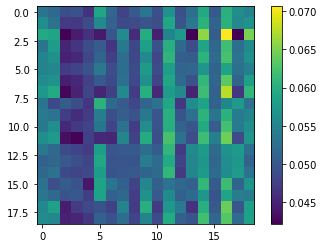

In [53]:
plt.imshow(candidates_clusters)
plt.colorbar()

In [57]:
candidates_clusters.std(axis=1)

y
BACHMANN_PRIMARY2012      0.004111
BIDEN_PRIMARY2008         0.004472
CAIN_PRIMARY2012          0.008990
CLINTON_PRIMARY2008       0.004971
EDWARDS_PRIMARY2008       0.005129
GINGRICH_PRIMARY2012      0.003631
GIULIANI_PRIMARY2008      0.005356
HUCKABEE_PRIMARY2008      0.007416
HUNTSMAN_PRIMARY2012      0.004186
MCCAIN_PRIMARY2008        0.004358
OBAMA_PRIMARY2008         0.004798
PAUL_PRIMARY2012          0.006770
PAWLENTY_PRIMARY2012      0.004086
PERRY_PRIMARY2012         0.003724
RICHARDSON_PRIMARY2008    0.003947
ROMNEY_PRIMARY2008        0.004427
ROMNEY_PRIMARY2012        0.003512
SANTORUM_PRIMARY2012      0.005828
THOMPSON_PRIMARY2008      0.005365
dtype: float64

In [45]:
x = candidates_clusters / candidates_clusters.sum(axis=0)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,0.009887,0.009314,0.010697,0.010577,0.009647,0.011266,0.010769,0.009159,0.010417,0.009493,0.009998,0.009529,0.009642,0.010513,0.010044,0.009777,0.009839,0.010616,0.009852
BIDEN_PRIMARY2008,0.012563,0.011473,0.012358,0.012201,0.012265,0.012876,0.012896,0.011189,0.012209,0.010636,0.012034,0.012023,0.011731,0.012873,0.012336,0.012087,0.011918,0.012678,0.012283
CAIN_PRIMARY2012,0.003928,0.003740,0.003270,0.003376,0.003413,0.002992,0.003674,0.003777,0.003353,0.003767,0.003221,0.003281,0.003999,0.002989,0.003938,0.003491,0.004089,0.002819,0.004123
CLINTON_PRIMARY2008,0.296987,0.312089,0.295846,0.299620,0.306614,0.289650,0.291539,0.307611,0.301339,0.311356,0.301026,0.303872,0.306457,0.293445,0.298289,0.302315,0.303773,0.297784,0.300399
EDWARDS_PRIMARY2008,0.072511,0.071841,0.069323,0.069193,0.071092,0.069489,0.070265,0.070781,0.071209,0.070315,0.069665,0.072427,0.070444,0.071378,0.072439,0.071964,0.072237,0.070903,0.071678
GINGRICH_PRIMARY2012,0.038532,0.037452,0.038844,0.038851,0.038885,0.038536,0.038443,0.037756,0.038090,0.038711,0.037491,0.036895,0.038077,0.038795,0.036315,0.037753,0.036118,0.037498,0.036861
GIULIANI_PRIMARY2008,0.053504,0.052374,0.050129,0.050152,0.051165,0.049427,0.052166,0.051595,0.051820,0.051706,0.050292,0.051036,0.052412,0.050545,0.052990,0.051620,0.053364,0.049826,0.053805
HUCKABEE_PRIMARY2008,0.028934,0.028959,0.025181,0.026081,0.027156,0.023342,0.026853,0.028702,0.026595,0.028944,0.025078,0.026375,0.029623,0.024232,0.028248,0.026945,0.029935,0.023940,0.029631
HUNTSMAN_PRIMARY2012,0.005755,0.005078,0.006443,0.006131,0.005671,0.006732,0.006331,0.005599,0.005838,0.005347,0.006269,0.005810,0.005365,0.006518,0.005781,0.005805,0.005263,0.006329,0.005527


In [46]:
x.sum(axis=0)b

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
dtype: float64

In [ ]:
df = pd.DataFrame(pipe_19_glove.predict(np.array(labeled.)))
df[1] = 1
df.groupby(0).sum().plot.bar()